<a href="https://colab.research.google.com/github/Dilparao/CE888/blob/master/lab2final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [10]:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def boostrap_mean(sample, sample_size, n_iterations):
  bs_sample=np.random.choice(sample,size=(n_iterations,sample_size),replace=True)
  row_mean=np.mean(bs_sample,axis=1)
  data_mean=np.mean(row_mean)
  lower=np.percentile(row_mean,5)
  upper=np.percentile(row_mean,95)
  return data_mean, lower, upper

In [11]:

def boostrap_mean_ci(sample, sample_size, n_iterations,ci):
  bs_sample=np.random.choice(sample,size=(n_iterations,sample_size),replace=True)
  row_mean=np.mean(bs_sample,axis=1)
  data_mean=np.mean(row_mean)
  lower=np.percentile(row_mean,(100-ci)/2)
  upper=np.percentile(row_mean,100-((100-ci)/2))
  return data_mean, lower, upper

(0, 100000)

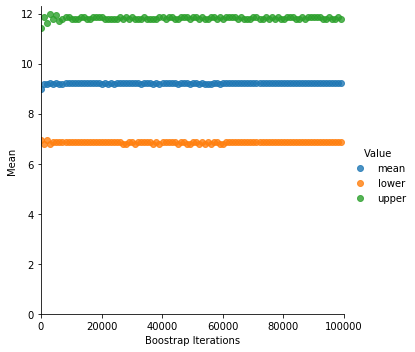

In [12]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')


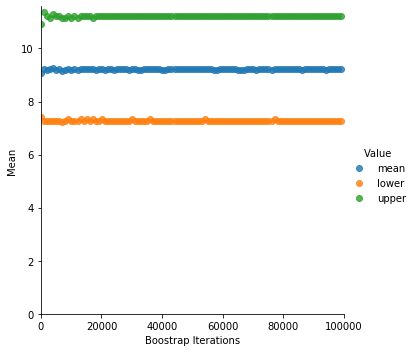

In [13]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

In [5]:
df= pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


In [15]:
df.columns

Index(['Current fleet', 'New Fleet'], dtype='object')

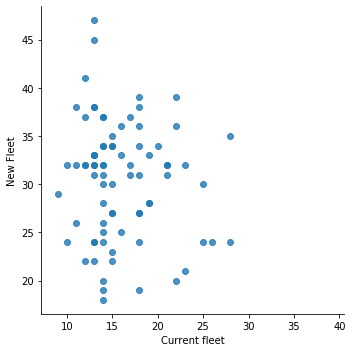

In [16]:
data=df[df.columns[1]].values
sns.lmplot(df.columns[0],df.columns[1],data=df,fit_reg=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E99AF042C8>,
      dtype=object)

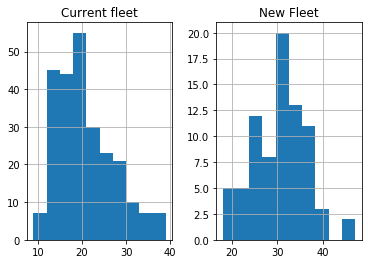

In [17]:
df.hist()

In [18]:
df[['Current fleet']].mean(axis=0)
df[['New Fleet']].mean(axis=0)
current=df[df.columns[0]]
new=df[df.columns[1]][:79]

In [19]:
m,l,u=boostrap_mean(current, len(current), 1000)
print(m)
print(l)

20.137353413654616
19.45763052208835


In [20]:
a,b,c=boostrap_mean(new, len(new), 1000)
print(a)
print(b)
diff_obs=a-m
print(diff_obs)
ctr=0

30.49226582278481
29.367088607594937
10.354912409130193


In [21]:
for i in range(10000):
  concat=np.concatenate((current,new))
  permut=np.random.permutation(concat)
  pold = permut[:249]
  pnew = permut[249:]
  #print(pold,pnew)
  #print('')
  pold1,b,c=boostrap_mean(pold, len(pold), 1)
  pnew1,d,e=boostrap_mean(pnew, len(pnew), 1)
  #print(pold1,pnew1)
  #print(pnew1,pold1)
  diff_perm=pnew1-pold1
  #print(diff_perm)
  if(diff_perm>diff_obs):
    ctr=ctr+1

print(ctr/10000)
 

0.0


In [1]:
# Function to calculate the p values
def pvalue_calc(iterations,data1,data2,tot_obs):
  concat = np.concatenate((data1,data2))
  cnt=0
  for i in range(0,iterations):
    perm = np.random.permutation(concat)
    pcurrent = perm[:len(data1)]
    pnew = perm[len(data1):]
    mean_perm_old=pcurrent.mean()
    mean_perm_new=pnew.mean()
    t_perm=mean_perm_new-mean_perm_old
    if(t_perm>t_obs):
      cnt+=1
  p_value=cnt/iterations
  return p_value

In [6]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!
data_current_fleet=np.array(df[df.columns[0]].values)
data_new_fleet=np.array(df[df.columns[1]].dropna().values)
mean_current=data_current_fleet.mean()
mean_new=data_new_fleet.mean()
t_obs=mean_new-mean_current

In [7]:
p_val=pvalue_calc(50000,data_current_fleet,data_new_fleet,t_obs)
print(p_val)

0.0


In [25]:
old = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
new = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])
mean_current=old.mean()
mean_new=new.mean()
t_obs=mean_new-mean_current
p_val=calc_pvalue(20000,old,new,t_obs)
print(p_val)

0.0322
